In [47]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [59]:
#parametros 
r = 0.9     #Taxa de reproducao da presa
a = 0.001   #Taxa de mortalidade dos predadores
m = 0.9     #Taxa de predacao

strSave = "ABA"
rng = np.random.RandomState(0)

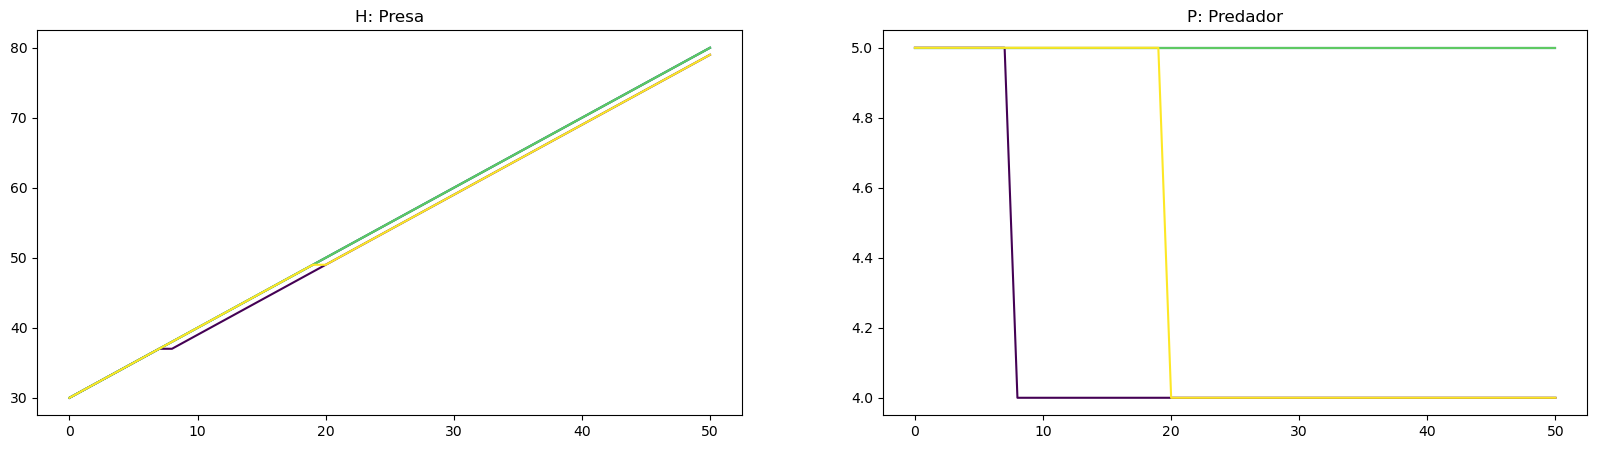

In [60]:
figure, axis = plt.subplots(1, 2)
figure.set_size_inches(20, 5)
cmap1 = cm.get_cmap('viridis', 5)

for k in range(5):
    H = 30          #presa
    P = 5           #predador
    tresult = [0]
    hresult = [H]
    presult = [P]


    for t in range(50): 
        p = random.rand()

        if(H == 0.0 and P == 0.0): break

        p1 = r*H        #reproducao das presas
        p2 = a*H*p      #predacao
        p3 = m*p        #morte dos predadores
        s = p1+p2+p3

        """ EDO: 
            dHdt = rH - aHP
            dPdt = bHP - mP
        """

        #aconteceu reproducao da presa
        #H aumenta 1 individuo
        if p <= p1/s:
            H += 1
        
        #predacao
        #uma presa morre e um predador nasce
        elif p <= (p1+p2)/s:
            H -= 1
            P += 1
        
        #morte do predador. Diminui P em 1 individuo 
        else: 
            P -= 1
        
        hresult.append(H)
        presult.append(P)
        tresult.append(t)

    hresult = np.array(hresult)
    presult = np.array(presult)
    tresult = np.array(tresult)


    
    axis[0].plot(hresult, color = cmap1(k))
    axis[0].set_title('H: Presa')
    
    axis[1].plot(presult, color = cmap1(k))
    axis[1].set_title('P: Predador')


    plt.savefig(f'results/modelo_{strSave}.png')